# UFC Data Exploration - Initial Analysis

This notebook was our first look at the comprehensive UFC Dataset (https://www.kaggle.com/datasets/nickshillito/comprehensive-ufc-data). In this file we are going to to explore what data we have, understand the structure, and look for any interesting patterns that immedietly stick out

The complete dataset consists of four .csv files 

1) fighter_attributes

2) fighter_history

3) fighter_stats

4) ufc-events

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded")

Libraries loaded successfully!


## 1. Load the Data

First step is loading the data and take a look at what we have. Using `pd.read_csv()` we will load the CSV files and then check the shapes to see how much data there is.

In [3]:
fighter_attributes = pd.read_csv('data/fighter_attributes.csv')
fighter_history = pd.read_csv('data/fighter_history.csv')
fighter_stats = pd.read_csv('data/fighter_stats.csv')
ufc_events = pd.read_csv('data/ufc-events.csv')

print(f"Fighter Attributes: {fighter_attributes.shape[0]} rows, {fighter_attributes.shape[1]} columns")
print(f"Fighter History: {fighter_history.shape[0]} rows, {fighter_history.shape[1]} columns")
print(f"Fighter Stats: {fighter_stats.shape[0]} rows, {fighter_stats.shape[1]} columns")
print(f"UFC Events: {ufc_events.shape[0]} rows, {ufc_events.shape[1]} columns")


Fighter Attributes: 3035 rows, 13 columns
Fighter History: 17837 rows, 16 columns
Fighter Stats: 34586 rows, 57 columns
UFC Events: 8925 rows, 39 columns


As we can see from the output (and looking at the .csv files raw) we can see that we have a lot of data to work with. 

## 2. Fighter Attributes Analysis

We decided to start with the fighter_attributes file since that seems like the most straightforward dataset (and the one that the team was initially most interested in). The .csv has data like physical characteristics like height, weight, etc for each fighter.

We will be starting with `.head()`, `.info()`, and `.describe()` to initially explore the data.

In [4]:
print("Fighter Attributes Sample:")
print("")
fighter_attributes.head(10)

Fighter Attributes Sample:



,fighter_id,name,height,weight,age,dob,gender,weight_class,reach,stance,style,gym,country
0,3332412,Islam Makhachev,177.80,70.31,33.0,1991-10-27,male,welterweight,179.07,southpaw,wrestling,eagles mma,russia
1,4350762,Zhang Weili,162.56,52.16,36.0,1989-08-13,female,womens-flyweight,160.02,switch,muay thai,beijing black tiger,china
2,4294832,Carlos Prates,185.42,77.11,32.0,1993-08-17,male,welterweight,198.12,switch,striker,fighting nerds,brazil
3,4243624,Tracy Cortez,165.10,56.70,31.0,1993-12-10,female,womens-flyweight,166.37,orthodox,mixed martial artist,fight ready,usa
4,4690541,Gregory Rodrigues,190.50,83.91,33.0,1992-02-17,male,middleweight,190.50,orthodox,grappling,kill cliff fc,brazil
5,4426250,Rodolfo Vieira,182.88,83.91,36.0,1989-09-25,male,middleweight,185.42,orthodox,brazilian jiu-jitsu,fighting nerds,brazil
6,2478987,Eric McConico,182.88,92.53,35.0,1990-05-09,male,middleweight,195.58,southpaw,NaN,mma lab,usa
7,5028019,Fatima Kline,167.64,52.16,25.0,2000-07-12,female,womens-strawweight,171.45,orthodox,NaN,silver fox bjj,usa
8,2553261,Gerald Meerschaert,185.42,83.91,37.0,1987-12-18,male,middleweight,195.58,southpaw,brazilian jiu-jitsu,kill cliff fc,usa
9,4916251,Jacqueline Cavalcanti,172.72,60.78,28.0,1997-08-29,female,womens-bantamweight,177.80,orthodox,striker,syndicate mma,portugal


In [5]:
print("Data Types:")
print(fighter_attributes.dtypes)
print("")
print("="*50)
print("")
print("Missing Values:")
missing_vals = fighter_attributes.isnull().sum()
print(missing_vals)

Data Types:
fighter_id        int64
name             object
height          float64
weight          float64
age             float64
dob              object
gender           object
weight_class     object
reach           float64
stance           object
style            object
gym              object
country          object
dtype: object


Missing Values:
fighter_id         0
name               0
height           251
weight           229
age              332
dob              332
gender             0
weight_class     158
reach            572
stance           132
style           1534
gym              729
country          644
dtype: int64


In [6]:
fighter_attributes.describe()

,fighter_id,height,weight,age,reach
count,3.035000e+03,2784.000000,2806.000000,2703.000000,2463.000000
mean,3.502266e+06,178.161293,75.564038,36.991121,182.223703
std,1.007045e+06,9.076822,16.442633,6.944045,10.837877
min,2.220951e+06,152.400000,47.630000,19.000000,147.320000
25%,2.512062e+06,172.720000,61.690000,32.000000,175.260000
50%,3.096577e+06,177.800000,70.310000,36.000000,182.880000
75%,4.389172e+06,185.420000,83.910000,41.500000,190.500000
max,5.310572e+06,210.820000,140.610000,71.000000,214.630000


It seems like there's a good amount of missing data, especially in the reach column and the style column. That makes sense as based on the groups knowledge of the UFC, not all fighters have complete records, even on apps like ESPN. 

Now we are going to visualize some of the data using the applicable graphs.

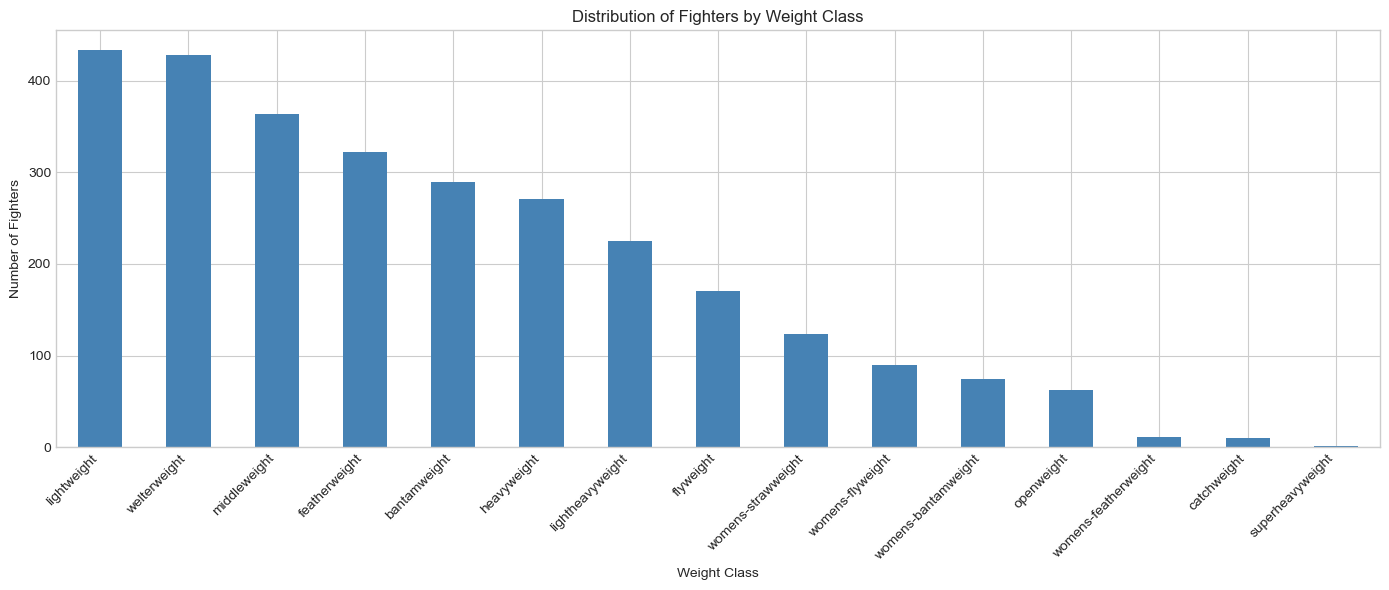

In [7]:
weight_class_counts = fighter_attributes['weight_class'].value_counts()

plt.figure(figsize=(14, 6))
weight_class_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Fighters by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

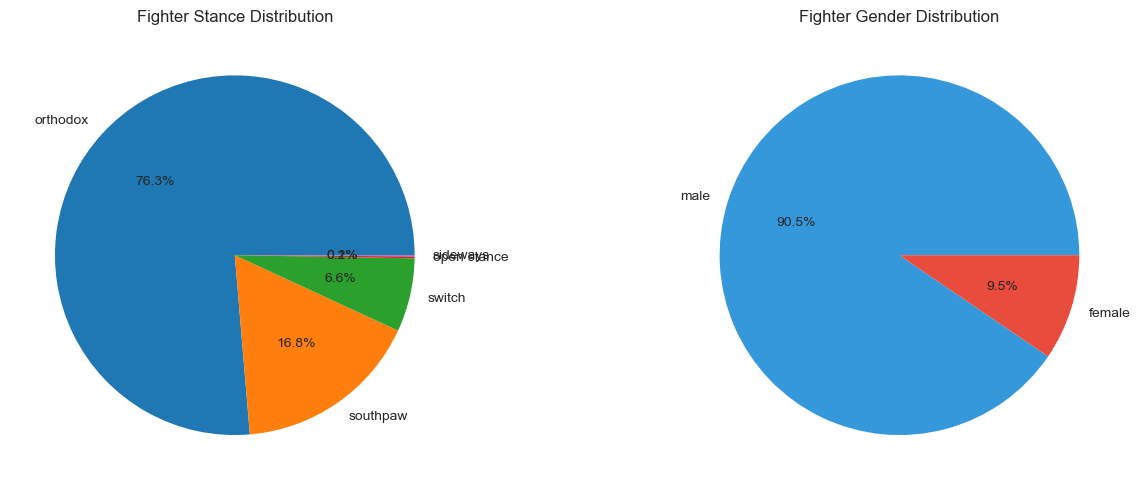

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

stance_counts = fighter_attributes['stance'].value_counts()
axes[0].pie(stance_counts.values, labels=stance_counts.index, autopct='%1.1f%%')
axes[0].set_title('Fighter Stance Distribution')

gender_counts = fighter_attributes['gender'].value_counts()
colors = ['#3498db', '#e74c3c']
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Fighter Gender Distribution')

plt.tight_layout()
plt.show()

Based on the graphs, Lightweight and Welterweight are the most popular weight classes. This makes sense since those are kind of the "normal" weight ranges for most people and typically the easiest for fighters to make weight for and maintain that weight. 

For stance looks like Orthodox (right-handed) is by far the most common.

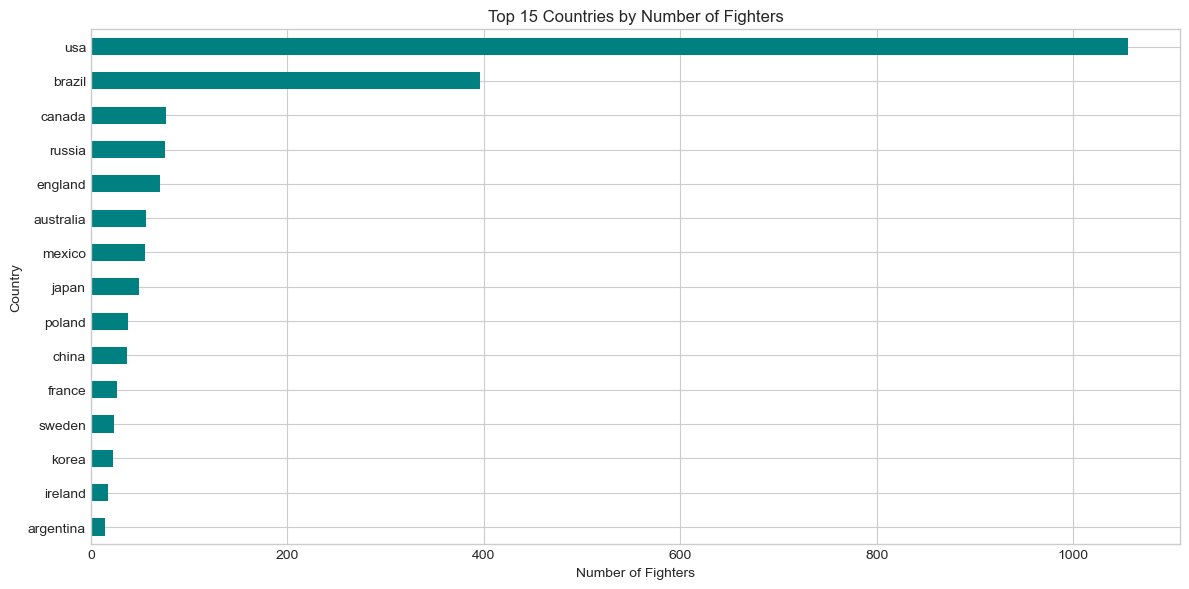

In [9]:
country_counts = fighter_attributes['country'].value_counts()
top_countries = country_counts.head(15)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh', color='teal')
plt.title('Top 15 Countries by Number of Fighters')
plt.xlabel('Number of Fighters')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

We expected USA to be the most common fighter country but it was way more dominant than the group expected. Brazil and Russia are also big contributors which makes sense given their strong fighting traditions.

Now we are going to explore age distribution. From the graphing lectures, histograms are the best choice of graph for this. 

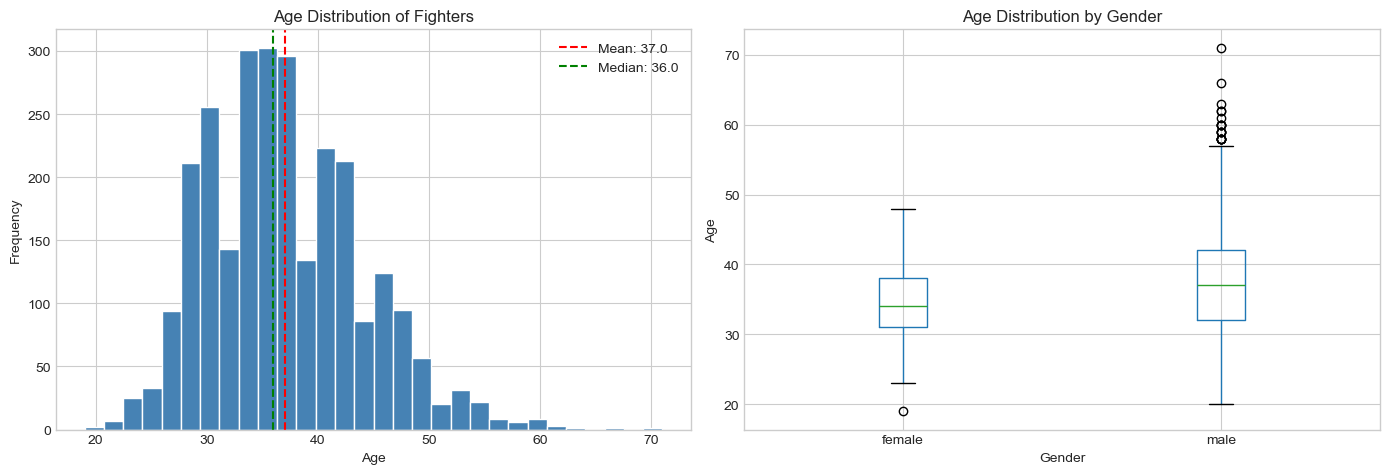

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

age_data = fighter_attributes['age'].dropna()
axes[0].hist(age_data, bins=30, color='steelblue', edgecolor='white')
mean_age = fighter_attributes['age'].mean()
median_age = fighter_attributes['age'].median()
axes[0].axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
axes[0].axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.1f}')
axes[0].set_title('Age Distribution of Fighters')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

fighter_attributes.boxplot(column='age', by='gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
plt.suptitle('')

plt.tight_layout()
plt.show()

The age distribution looks pretty normal, centered around 30-35 years old. Mean is slightly higher than median which indicates a small right skew. This makes sense since you can have older fighters but not really younger than ~18. For the male age distribution what really stood out and teh group found interesting was that there were some really old fighters (oldest being 71 years old). 

Now we are going to look at height vs weight. We think that this should be an interesting relationship. Scatter plots are good for showing relationships between two continuous variables.

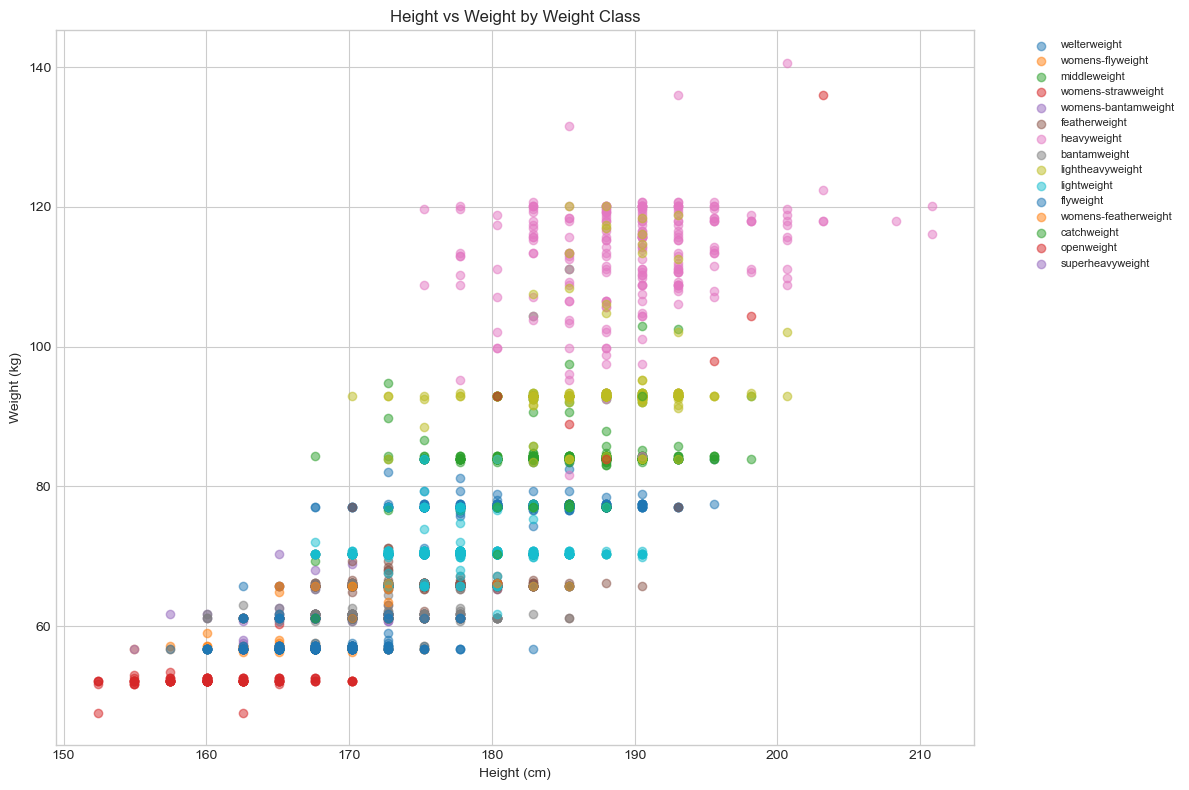

In [11]:
plt.figure(figsize=(12, 8))

weight_classes = fighter_attributes['weight_class'].unique()
for wc in weight_classes:
    if pd.notna(wc):
        subset = fighter_attributes[fighter_attributes['weight_class'] == wc]
        plt.scatter(subset['height'], subset['weight'], label=wc, alpha=0.5)

plt.title('Height vs Weight by Weight Class')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

You can see height and weight are clearly correlated (which obviously makes sense) and the weight classes form distinct horizontal bands because of the weight limit to fight. Heavier weight classes are obviously higher up on the y-axis.

Now we are going to look at what fighting styles are most common in the dataset.

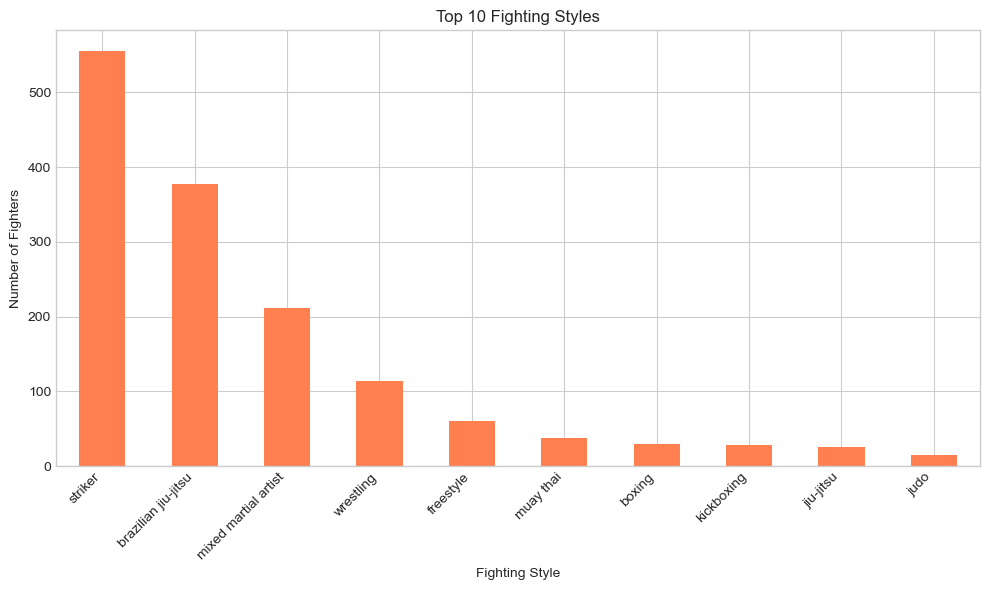

In [12]:
style_data = fighter_attributes['style'].value_counts()
style_counts = style_data.head(10)

plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Fighting Styles')
plt.xlabel('Fighting Style')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I noticed earlier that reach had missing values. I wonder if reach is important for fighter success. This could be something to investigate more later in more depth

## 3. Fighter History Analysis

Now we are going to look at the fight history data. This should tell us about actual fight outcomes - wins, losses, how fights ended, etc.

In [13]:
print("Fighter History Sample:")
print("")
fighter_history.head(10)

Fighter History Sample:



,uid,fight_id,event_id,event_date,event_name,promotion,fighter_id,fighter_name,fight_result,opponent_id,opponent_name,title_fight,fight_end_round,fight_result_type,fight_duration,over_2_5
0,s:3301~l:3321~e:600051442~c:401751541,600051442-4873640-3028863,600051442,2025-01-18,UFC 311,UFC,3332412,islam makhachev,W,3028863,renato moicano,True,1,SUBMISSION,4.08,False
1,s:3301~l:3321~e:600044413~c:401652641,600044413-4873640-2506549,600044413,2024-06-01,UFC 302,UFC,3332412,islam makhachev,W,2506549,dustin poirier,True,5,SUBMISSION,22.70,True
2,s:3301~l:3321~e:600031832~c:401534648,600031832-3949584-4873640,600031832,2023-10-21,UFC 294,UFC,3332412,islam makhachev,W,3949584,alexander volkanovski,True,1,KO-TKO,3.10,False
3,s:3301~l:3321~e:600025531~c:401498612,600025531-3949584-4873640,600025531,2023-02-11,UFC 284,UFC,3332412,islam makhachev,W,3949584,alexander volkanovski,True,5,DEC-UNA,25.00,True
4,s:3301~l:3321~e:600017767~c:401423650,600017767-4873640-2504169,600017767,2022-10-22,UFC 280,UFC,3332412,islam makhachev,W,2504169,charles oliveira,True,2,SUBMISSION,8.27,False
5,s:3301~l:3321~e:600014327~c:401396271,600014327-4873640-2502364,600014327,2022-02-26,UFC Fight Night,UFC,3332412,islam makhachev,W,2502364,king green,False,1,KO-TKO,3.38,False
6,s:3301~l:3321~e:600009660~c:401379570,600009660-4873640-3109135,600009660,2021-10-30,UFC 267,UFC,3332412,islam makhachev,W,3109135,dan hooker,False,1,SUBMISSION,2.42,False
7,s:3301~l:3321~e:600006953~c:401334701,600006953-3955778-4873640,600006953,2021-07-17,UFC Fight Night,UFC,3332412,islam makhachev,W,3955778,thiago moises,False,4,SUBMISSION,17.63,True
8,s:3301~l:3321~e:600001860~c:401289255,600001860-4873640-2951202,600001860,2021-03-06,UFC 259,UFC,3332412,islam makhachev,W,2951202,drew dober,False,3,SUBMISSION,11.62,False
9,s:3301~l:3321~e:401129626~c:267839,401129626-4873640-3114625,401129626,2019-09-07,UFC 242,UFC,3332412,islam makhachev,W,3114625,davi ramos,False,3,DEC-UNA,15.00,True


In [14]:
fighter_history['event_date'] = pd.to_datetime(fighter_history['event_date'])

print(f"Total fights recorded: {len(fighter_history)}")
print(f"Unique fighters: {fighter_history['fighter_id'].nunique()}")
print(f"Date range: {fighter_history['event_date'].min()} to {fighter_history['event_date'].max()}")

Total fights recorded: 17837
Unique fighters: 3015
Date range: 1993-11-13 00:00:00 to 2025-09-27 00:00:00


The data goes back to 1993 which is basically the start of UFC! 

Need to convert the event_date column to datetime. (either with `parse_dates` when reading the CSV or converting after).

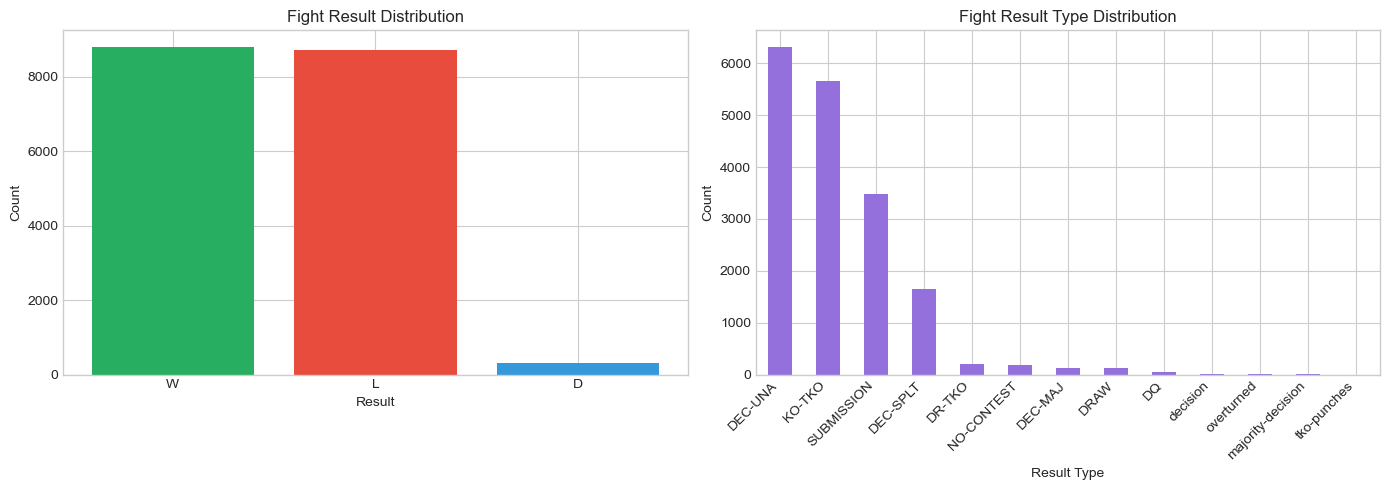

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

result_counts = fighter_history['fight_result'].value_counts()
colors_dict = {'W': '#27ae60', 'L': '#e74c3c', 'D': '#3498db', 'NC': '#95a5a6'}
result_colors = []
for r in result_counts.index:
    if r in colors_dict:
        result_colors.append(colors_dict[r])
    else:
        result_colors.append('#333')
        
axes[0].bar(result_counts.index, result_counts.values, color=result_colors)
axes[0].set_title('Fight Result Distribution')
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Count')

result_type_counts = fighter_history['fight_result_type'].value_counts()
result_type_counts.plot(kind='bar', ax=axes[1], color='mediumpurple')
axes[1].set_title('Fight Result Type Distribution')
axes[1].set_xlabel('Result Type')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

This tells us how fights typically end

Wins and losses are about equal which makes sense. Decisions (DEC-UNA) and KO/TKO are the most common ways fights end.

Let me look at how UFC has grown over time.

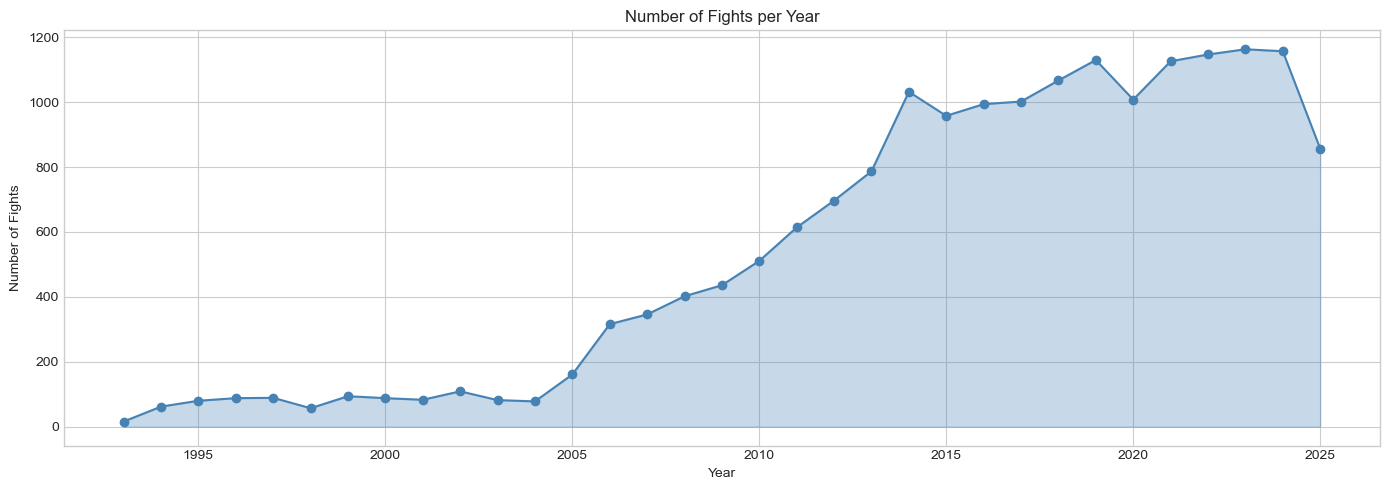

In [17]:
fighter_history['year'] = fighter_history['event_date'].dt.year
fights_by_year = fighter_history.groupby('year').size()

plt.figure(figsize=(14, 5))
plt.fill_between(fights_by_year.index, fights_by_year.values, alpha=0.3, color='steelblue')
plt.plot(fights_by_year.index, fights_by_year.values, 'o-', color='steelblue')
plt.title('Number of Fights per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.tight_layout()
plt.show()

You can see UFC has grown a lot over the years. There's a dip around 2020 which was probably COVID. 

Now we are going to investigate title fights

In [18]:
title_fight_data = fighter_history[fighter_history['title_fight'] == True]
print(f"Total title fights: {len(title_fight_data)}")
print(f"\nTitle fights by result type:")
print(title_fight_data['fight_result_type'].value_counts())

Total title fights: 959

Title fights by result type:
fight_result_type
KO-TKO        343
DEC-UNA       288
SUBMISSION    214
DEC-SPLT       68
DR-TKO         16
DRAW           16
DEC-MAJ         8
DQ              2
NO-CONTEST      2
Name: count, dtype: int64


looking at number of raw wins for fighters

In [19]:
fighter_wins = fighter_history.groupby('fighter_id').agg({
    'fight_result': lambda x: (x == 'W').sum(),
    'fighter_name': 'first'
}).rename(columns={'fight_result': 'wins'})

fighter_losses = fighter_history.groupby('fighter_id').apply(lambda x: (x['fight_result'] == 'L').sum())
fighter_wins['losses'] = fighter_losses
fighter_wins['total_fights'] = fighter_wins['wins'] + fighter_wins['losses']
fighter_wins['win_rate'] = fighter_wins['wins'] / fighter_wins['total_fights']

top_winners = fighter_wins.nlargest(15, 'wins')
print("Top 15 Fighters by Wins:")
top_winners[['fighter_name', 'wins', 'losses', 'win_rate']]

Top 15 Fighters by Wins:


C:\Users\maxsj\AppData\Local\Temp\ipykernel_36092\3548889576.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fighter_losses = fighter_history.groupby('fighter_id').apply(lambda x: (x['fight_result'] == 'L').sum())


,fighter_name,wins,losses,win_rate
fighter_id,,,,
2335718,jim miller,27,18,0.600000
3001914,neil magny,24,13,0.648649
2354269,andrei arlovski,23,18,0.560976
2479918,donald cerrone,23,14,0.621622
2504169,charles oliveira,23,11,0.676471
2614933,max holloway,23,8,0.741935
2335639,jon jones,22,1,0.956522
2335778,demian maia,22,11,0.666667
2506549,dustin poirier,22,9,0.709677


Jim Miller, Donald Cerrone, and Andrei Arlovski are at the top, these are all veterans with long careers. Jon Jones has an insane win rate of 95.7%!

Now looking at fight duration

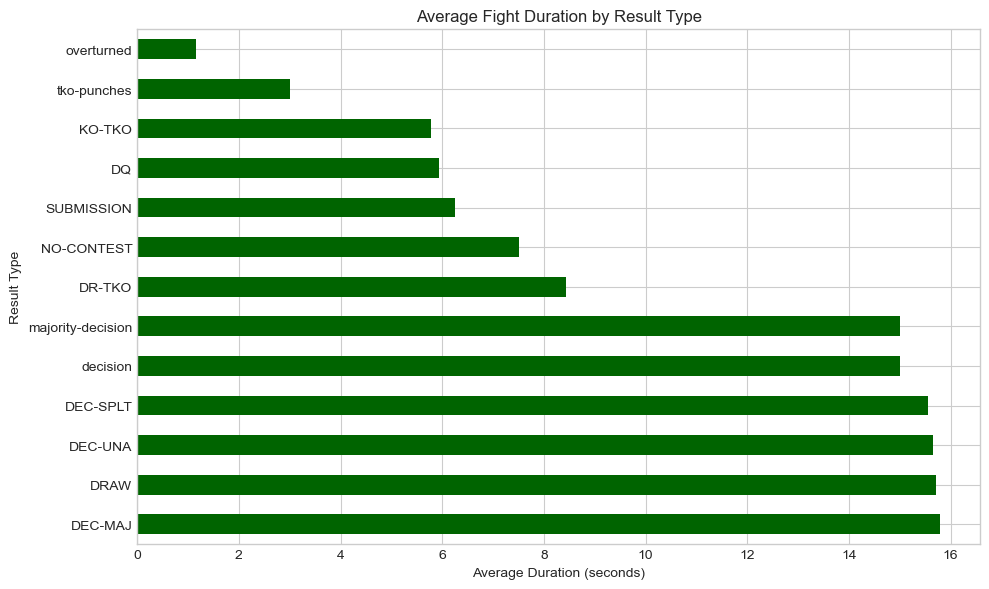

In [22]:
avg_durations = fighter_history.groupby('fight_result_type')['fight_duration'].mean()
avg_durations_sorted = avg_durations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_durations_sorted.plot(kind='barh', color='darkgreen')
plt.title('Average Fight Duration by Result Type')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Result Type')
plt.tight_layout()
plt.show()

Decision fights go the longest (obviously since they go the full distance). KO/TKOs are the quickest. Submissions are somewhere in between.

Now let me look at the fighter_stats dataset which has detailed fight statistics like strikes, takedowns, etc.

## 4. Fighter Statistics Analysis



In [23]:
print("Fighter Stats Sample:")
cols = list(fighter_stats.columns)
print(f"Columns: {cols}")
print("")
fighter_stats.head()

Fighter Stats Sample:
Columns: ['uid', 'fighter_id', 'SDBL', 'SDBA', 'SDB_ACC', 'SDHL', 'SDHA', 'SDH_ACC', 'SDLL', 'SDLA', 'SDL_ACC', 'TSL', 'TSA', 'TS_ACC', 'SSL', 'SSA', 'SS_ACC', 'KD', 'SCBL', 'SCBA', 'SCB_ACC', 'SCHL', 'SCHA', 'SCH_ACC', 'SCLL', 'SCLA', 'SCL_ACC', 'RV', 'SR', 'TDA', 'TDL', 'TDS', 'TD_ACC', 'SGBL', 'SGBA', 'SGB_ACC', 'SGHL', 'SGHA', 'SGH_ACC', 'SGLL', 'SGLA', 'SGL_ACC', 'AD', 'ADTB', 'ADHG', 'ADTM', 'ADTS', 'SM', 'TSLL', 'TSLA', 'SL_ACC', 'TSBL', 'TSBA', 'SB_ACC', 'TSHL', 'TSHA', 'SH_ACC']



,uid,fighter_id,SDBL,SDBA,SDB_ACC,SDHL,SDHA,SDH_ACC,SDLL,SDLA,SDL_ACC,TSL,TSA,TS_ACC,SSL,SSA,SS_ACC,KD,SCBL,SCBA,SCB_ACC,SCHL,SCHA,SCH_ACC,SCLL,SCLA,SCL_ACC,RV,SR,TDA,TDL,TDS,TD_ACC,SGBL,SGBA,SGB_ACC,SGHL,SGHA,SGH_ACC,SGLL,SGLA,SGL_ACC,AD,ADTB,ADHG,ADTM,ADTS,SM,TSLL,TSLA,SL_ACC,TSBL,TSBA,SB_ACC,TSHL,TSHA,SH_ACC
0,s:3301~l:3321~e:600051442~c:401751541,3332412,1,2,0.50,4,16,0.25,0,0,0.0,18,31,0.58,6,19,0.32,0,0,0,0.0,0,0,0.00,0,0,0.0,0,0.0,2,1,0,0.50,0,0,0.0,1,1,1.0,0,0,0.0,0,0,0,0,0,1,0,0,0.0,1,2,0.50,5,17,0.29
1,s:3301~l:3321~e:600044413~c:401652641,3332412,3,3,1.00,68,132,0.52,0,1,0.0,147,222,0.66,88,156,0.56,0,4,4,1.0,7,10,0.70,0,0,0.0,0,0.0,16,5,0,0.31,0,0,0.0,6,6,1.0,0,0,0.0,0,0,0,0,0,2,0,1,0.0,7,7,1.00,81,148,0.55
2,s:3301~l:3321~e:600031832~c:401534648,3332412,2,4,0.50,3,5,0.60,2,2,1.0,39,46,0.85,24,29,0.83,1,7,7,1.0,1,2,0.50,0,0,0.0,0,0.0,1,0,0,0.00,0,0,0.0,9,9,1.0,0,0,0.0,0,0,0,0,0,0,2,2,1.0,9,11,0.82,13,16,0.81
3,s:3301~l:3321~e:600025531~c:401498612,3332412,9,11,0.82,33,68,0.49,3,3,1.0,95,135,0.70,57,95,0.60,0,9,9,1.0,3,4,0.75,0,0,0.0,0,0.0,9,4,0,0.44,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,3,3,1.0,18,20,0.90,36,72,0.50
4,s:3301~l:3321~e:600017767~c:401423650,3332412,0,1,0.00,21,30,0.70,0,0,0.0,72,86,0.84,30,41,0.73,1,5,5,1.0,0,0,0.00,0,0,0.0,0,0.0,3,2,0,0.67,0,0,0.0,4,5,0.8,0,0,0.0,0,0,0,0,0,1,0,0,0.0,5,6,0.83,25,35,0.71


Lots of columns with abbreviations. Making a reference for what some of these mean.

In [25]:
print("Key Statistics Columns:")
print("-" * 50)
print("TSL/TSA: Total Strikes Landed/Attempted")
print("TS_ACC: Total Strike Accuracy")
print("SSL/SSA: Significant Strikes Landed/Attempted")  
print("SS_ACC: Significant Strike Accuracy")
print("KD: Knockdowns")
print("TDL/TDA: Takedowns Landed/Attempted")
print("TD_ACC: Takedown Accuracy")
print("SDHL/SDHA: Strikes to Head Landed/Attempted")
print("SDBL/SDBA: Strikes to Body Landed/Attempted")
print("SDLL/SDLA: Strikes to Leg Landed/Attempted")

Key Statistics Columns:
--------------------------------------------------
TSL/TSA: Total Strikes Landed/Attempted
TS_ACC: Total Strike Accuracy
SSL/SSA: Significant Strikes Landed/Attempted
SS_ACC: Significant Strike Accuracy
KD: Knockdowns
TDL/TDA: Takedowns Landed/Attempted
TD_ACC: Takedown Accuracy
SDHL/SDHA: Strikes to Head Landed/Attempted
SDBL/SDBA: Strikes to Body Landed/Attempted
SDLL/SDLA: Strikes to Leg Landed/Attempted


aggregate the stats by fighter to get career totals

In [26]:
fighter_agg = fighter_stats.groupby('fighter_id').agg({
    'TSL': 'sum',
    'TSA': 'sum',
    'SSL': 'sum',
    'SSA': 'sum',
    'KD': 'sum',
    'TDL': 'sum',
    'TDA': 'sum'
})

fighter_agg['total_strike_acc'] = fighter_agg['TSL'] / fighter_agg['TSA']
fighter_agg['sig_strike_acc'] = fighter_agg['SSL'] / fighter_agg['SSA']
fighter_agg['takedown_acc'] = fighter_agg['TDL'] / fighter_agg['TDA']

fighter_agg = fighter_agg.fillna(0)

fighter_agg = fighter_agg.merge(
    fighter_attributes[['fighter_id', 'name', 'weight_class']], 
    on='fighter_id', 
    how='left'
)

fighter_agg.head(10)

,fighter_id,TSL,TSA,SSL,SSA,KD,TDL,TDA,total_strike_acc,sig_strike_acc,takedown_acc,name,weight_class
0,2220951,398,757,363,721,3,1,3,0.525760,0.503467,0.333333,Greg Hardy,heavyweight
1,2223033,199,342,108,212,1,4,14,0.581871,0.509434,0.285714,Austen Lane,heavyweight
2,2312150,416,940,310,791,1,3,21,0.442553,0.391909,0.142857,Mohammed Usman,heavyweight
3,2335243,1723,3316,969,2496,6,9,22,0.519602,0.388221,0.409091,Carlos Condit,welterweight
4,2335256,97,157,27,83,0,6,15,0.617834,0.325301,0.400000,Carmelo Marrero,NaN
5,2335298,456,553,213,296,2,15,28,0.824593,0.719595,0.535714,Brock Lesnar,heavyweight
6,2335302,383,639,172,412,5,5,6,0.599374,0.417476,0.833333,Heath Herring,heavyweight
7,2335338,1495,2064,779,1315,1,54,106,0.724322,0.592395,0.509434,Randy Couture,lightheavyweight
8,2335447,1248,1915,960,1410,21,6,8,0.651697,0.680851,0.750000,Anderson Silva,middleweight
9,2335448,1080,1832,662,1378,6,10,51,0.589520,0.480406,0.196078,Patrick Cote,welterweight


who the top strikers and grapplers are based on these aggregated stats

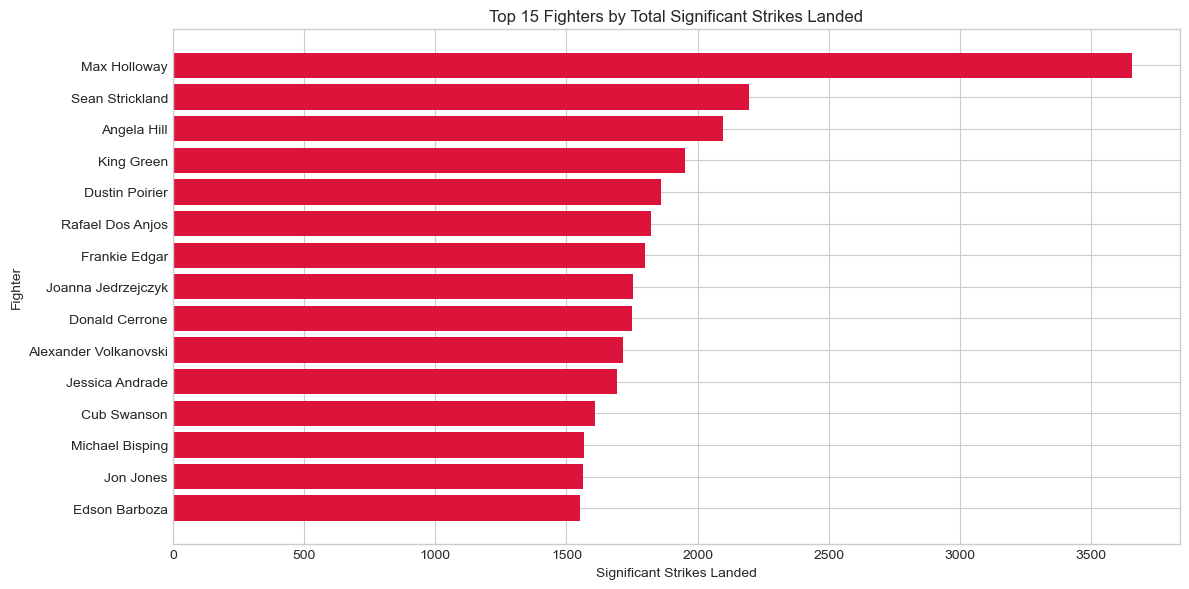

In [27]:
top_strikers = fighter_agg.nlargest(15, 'SSL')

plt.figure(figsize=(12, 6))
plt.barh(top_strikers['name'], top_strikers['SSL'], color='crimson')
plt.title('Top 15 Fighters by Total Significant Strikes Landed')
plt.xlabel('Significant Strikes Landed')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

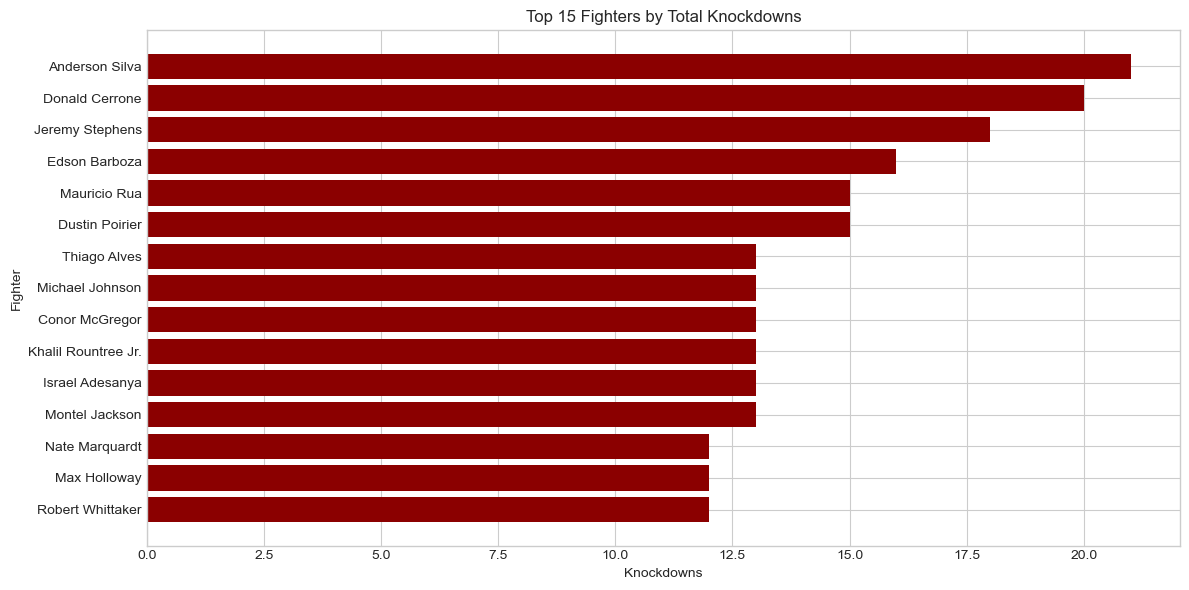

In [28]:
top_kd_fighters = fighter_agg.nlargest(15, 'KD')

plt.figure(figsize=(12, 6))
plt.barh(top_kd_fighters['name'], top_kd_fighters['KD'], color='darkred')
plt.title('Top 15 Fighters by Total Knockdowns')
plt.xlabel('Knockdowns')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

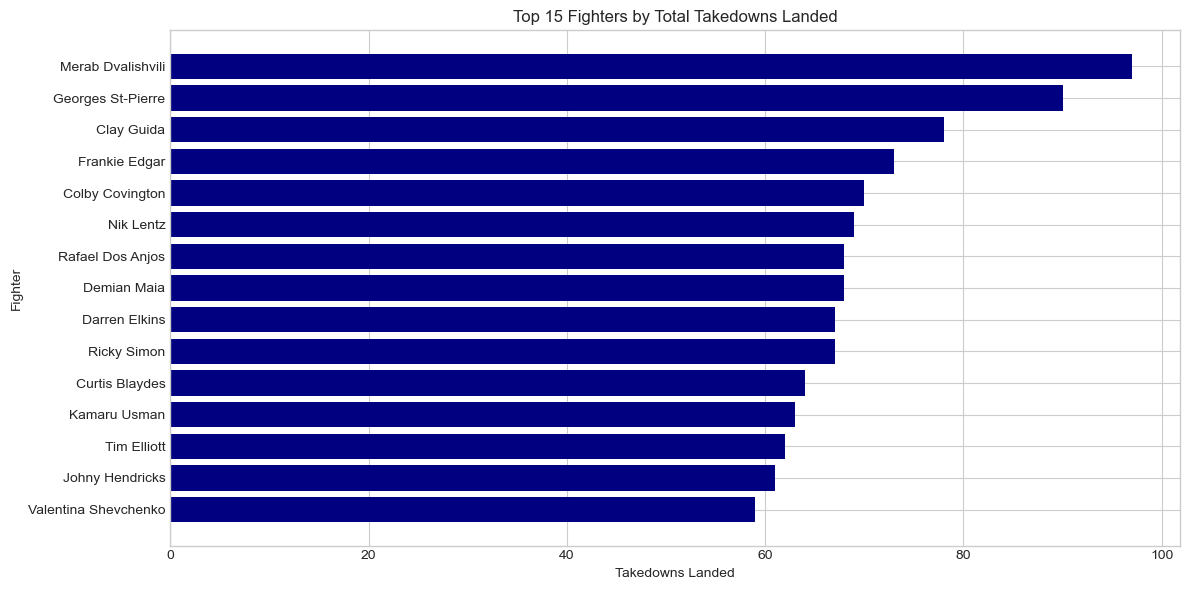

In [30]:
top_td_fighters = fighter_agg.nlargest(15, 'TDL')

plt.figure(figsize=(12, 6))
plt.barh(top_td_fighters['name'], top_td_fighters['TDL'], color='navy')
plt.title('Top 15 Fighters by Total Takedowns Landed')
plt.xlabel('Takedowns Landed')
plt.ylabel('Fighter')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

These are the top takedown artists consisting of mostly wrestlers and grapplers. This probably correlates with the fighters who have wrestling or grappling listed as their style.

Looking at the distribution of accuracy stats. Filtered for fighters with a minimum number of attempts so we don't get weird percentages from guys who only threw a few strikes.

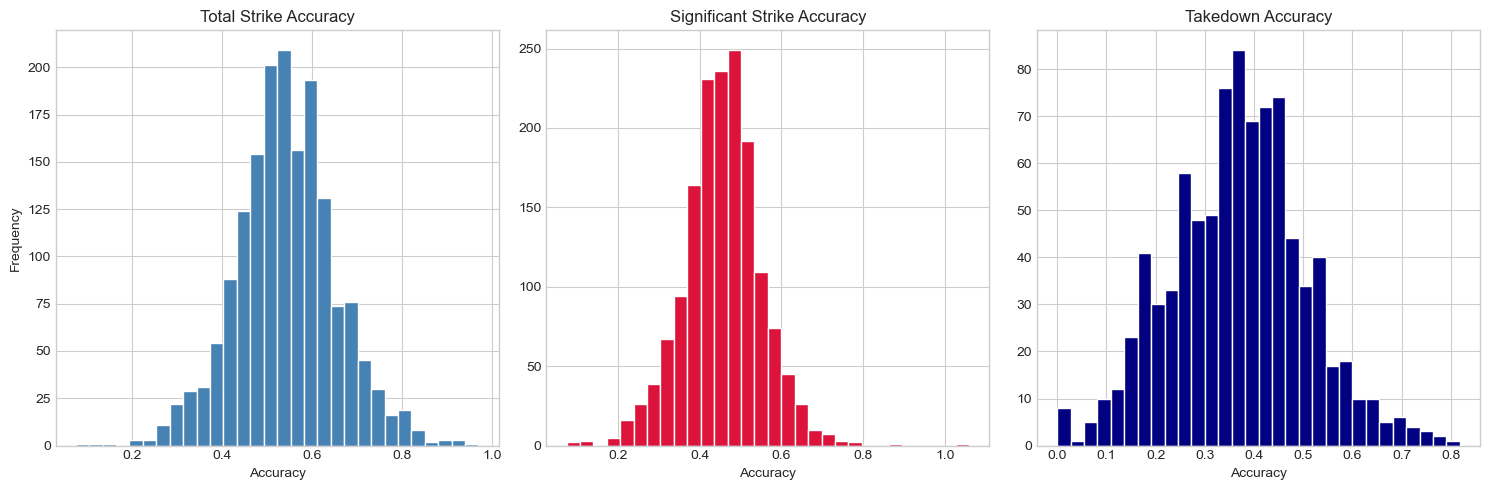

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

min_attempts = 50
filtered = fighter_agg[fighter_agg['TSA'] > min_attempts]

axes[0].hist(filtered['total_strike_acc'], bins=30, color='steelblue', edgecolor='white')
axes[0].set_title('Total Strike Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Frequency')

filtered2 = fighter_agg[fighter_agg['SSA'] > min_attempts]
axes[1].hist(filtered2['sig_strike_acc'], bins=30, color='crimson', edgecolor='white')
axes[1].set_title('Significant Strike Accuracy')
axes[1].set_xlabel('Accuracy')

filtered3 = fighter_agg[fighter_agg['TDA'] > 10]
axes[2].hist(filtered3['takedown_acc'], bins=30, color='navy', edgecolor='white')
axes[2].set_title('Takedown Accuracy')
axes[2].set_xlabel('Accuracy')

plt.tight_layout()
plt.show()

Strike accuracy looks like it's around 40-50% for most fighters. Takedown accuracy has more spread - some fighters are really good at it, others not so much.

Now let me look at the events data to understand where and when UFC events happen.

## 5. UFC Events Analysis



In [34]:
print("UFC Events Sample:")
print("")
ufc_events.head(10)

UFC Events Sample:



,event_id,event_uid,event_name,event_long_name,event_date,card_section,card_position,fight_id,fight_uid,weight_class,title_fight,title,red_corner_id,red_corner_uid,red_corner,blue_corner_id,blue_corner_uid,blue_corner,fight_completed,fight_end_round,fight_end_clock,fight_outcome,fight_winner,event_venue_id,event_venue,event_venue_city,event_venue_state,event_venue_country,referee_id,referee,judge_one_id,judge_one,judge_one_card,judge_two_id,judge_two,judge_two_card,judge_three_id,judge_three,judge_three_card
0,600056266,s:3301~l:3321~e:600056266,UFC Fight Night,UFC Fight Night: Royval vs. Kape,2025-12-13,MAIN_CARD,1,401830372,s:3301~l:3321~e:600056266~c:401830372,FLYWEIGHT,0,NaN,4239928,s:3301~a:4239928,Brandon Royval,4236504,s:3301~a:4236504,Manel Kape,0,0,0.0,NaN,NaN,6176.0,UFC APEX,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,1,401831048,s:3301~l:3321~e:600056375~c:401831048,BANTAMWEIGHT,1,BANTAMWEIGHT_TITLE,3948572,s:3301~a:3948572,Merab Dvalishvili,4293517,s:3301~a:4293517,Petr Yan,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,2,401831049,s:3301~l:3321~e:600056375~c:401831049,FLYWEIGHT,1,FLYWEIGHT_TITLE,2560746,s:3301~a:2560746,Alexandre Pantoja,5120301,s:3301~a:5120301,Joshua Van,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,3,401831054,s:3301~l:3321~e:600056375~c:401831054,BANTAMWEIGHT,1,BANTAMWEIGHT_TITLE,3023388,s:3301~a:3023388,Henry Cejudo,5144008,s:3301~a:5144008,Payton Talbott,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,4,401831055,s:3301~l:3321~e:600056375~c:401831055,LIGHT_HEAVYWEIGHT,0,NaN,2506250,s:3301~a:2506250,Jan Blachowicz,5152109,s:3301~a:5152109,Bogdan Guskov,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,MAIN_CARD,5,401831070,s:3301~l:3321~e:600056375~c:401831070,FLYWEIGHT,0,NaN,3027545,s:3301~a:3027545,Brandon Moreno,4917772,s:3301~a:4917772,Tatsuro Taira,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,600056375,s:3301~l:3321~e:600056375,UFC 323,UFC 323: Dvalishvili vs. Yan 2,2025-12-06,PRELIMS,6,401831056,s:3301~l:3321~e:600056375~c:401831056,LIGHTWEIGHT,0,NaN,5074130,s:3301~a:5074130,Nazim Sadykhov,4083018,s:3301~a:4083018,Fares Ziam,0,0,0.0,NaN,NaN,5060.0,T-Mobile Arena,Las Vegas,NV,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,6,401830354,s:3301~l:3321~e:600055175~c:401830354,FLYWEIGHT,0,NaN,3155425,s:3301~a:3155425,Alex Perez,4294926,s:3301~a:4294926,Asu Almabayev,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,12,401830939,s:3301~l:3321~e:600055175~c:401830939,WELTERWEIGHT,0,NaN,3074102,s:3301~a:3074102,Jack Hermansson,5050129,s:3301~a:5050129,Myktybek Orolbai,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,600055175,s:3301~l:3321~e:600055175,UFC Fight Night,UFC Fight Night: Tsarukyan vs. Hooker,2025-11-22,PRELIMS,11,401830358,s:3301~l:3321~e:600055175~c:401830358,FLYWEIGHT,0,NaN,4294924,s:3301~a:4294924,Tagir Ulanbekov,2613374,s:3301~a:2613374,Kyoji Horiguchi,0,0,0.0,NaN,NaN,11560.0,ABHA Arena,Doha,NaN,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [35]:
ufc_events['event_date'] = pd.to_datetime(ufc_events['event_date'])

total_fights = len(ufc_events)
unique_events = ufc_events['event_id'].nunique()
unique_venues = ufc_events['event_venue'].nunique()

print(f"Total fights: {total_fights}")
print(f"Unique events: {unique_events}")
print(f"Unique venues: {unique_venues}")
print(f"Date range: {ufc_events['event_date'].min()} to {ufc_events['event_date'].max()}")

Total fights: 8925
Unique events: 859
Unique venues: 229
Date range: 1993-11-12 00:00:00 to 2025-12-13 00:00:00


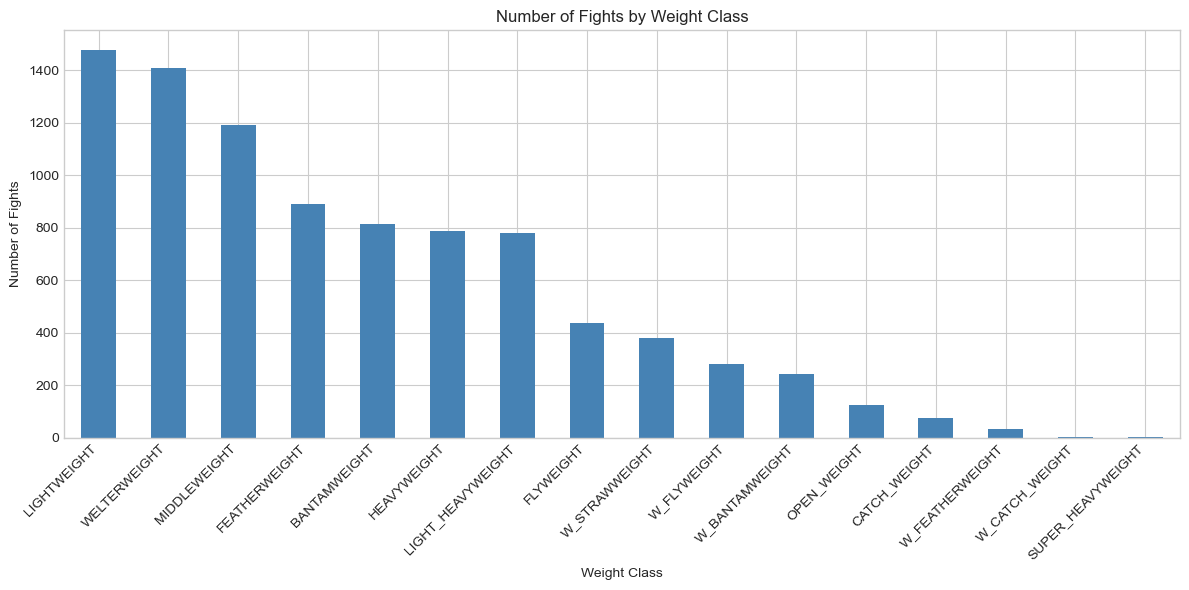

In [36]:
wc_counts = ufc_events['weight_class'].value_counts()

plt.figure(figsize=(12, 6))
wc_counts.plot(kind='bar', color='steelblue')
plt.title('Number of Fights by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

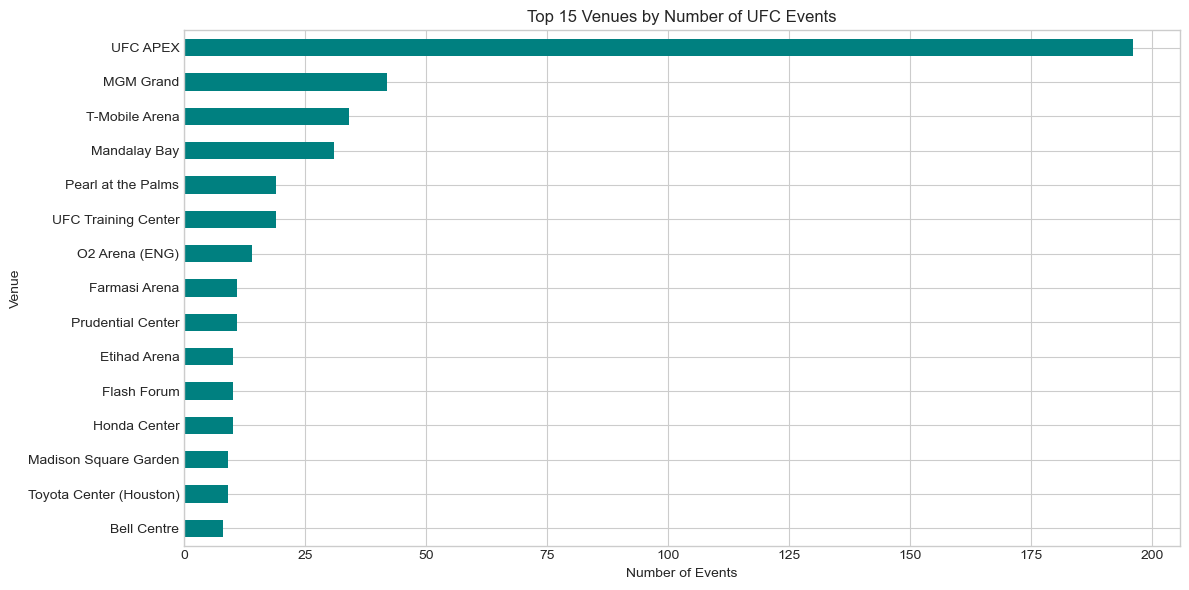

In [37]:
venues_by_events = ufc_events.groupby('event_venue')['event_id'].nunique()
top_venues = venues_by_events.nlargest(15)

plt.figure(figsize=(12, 6))
top_venues.plot(kind='barh', color='teal')
plt.title('Top 15 Venues by Number of UFC Events')
plt.xlabel('Number of Events')
plt.ylabel('Venue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

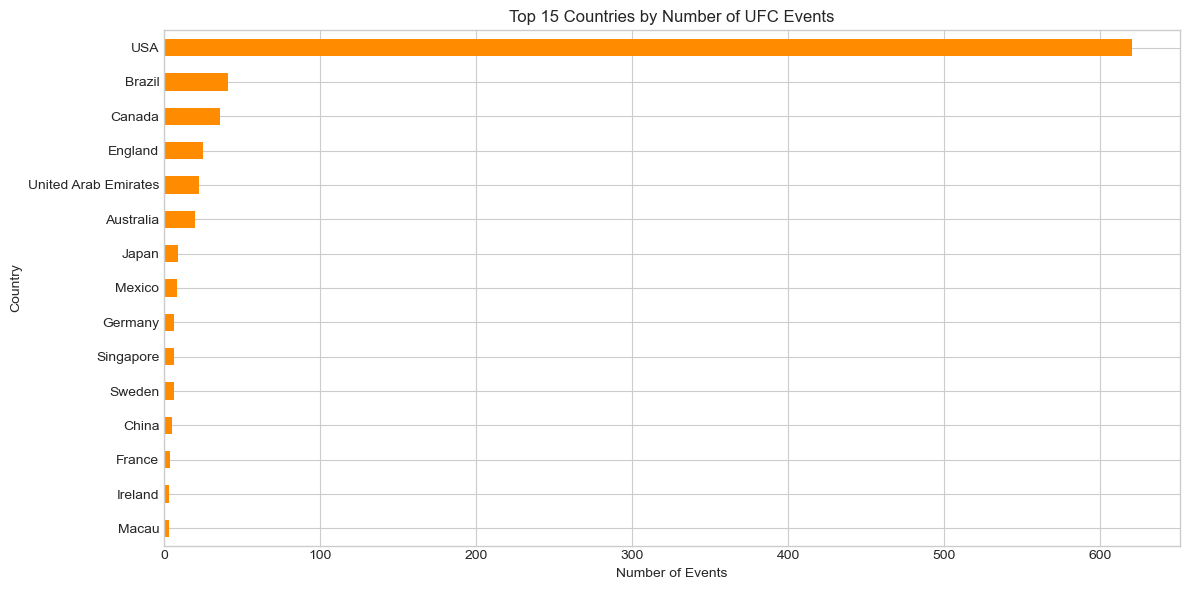

In [38]:
events_by_country = ufc_events.groupby('event_venue_country')['event_id'].nunique()
top_countries = events_by_country.nlargest(15)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh', color='darkorange')
plt.title('Top 15 Countries by Number of UFC Events')
plt.xlabel('Number of Events')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Las Vegas (UFC APEX and T-Mobile Arena) dominates. USA hosts the most events by far but they do go international to other countries.

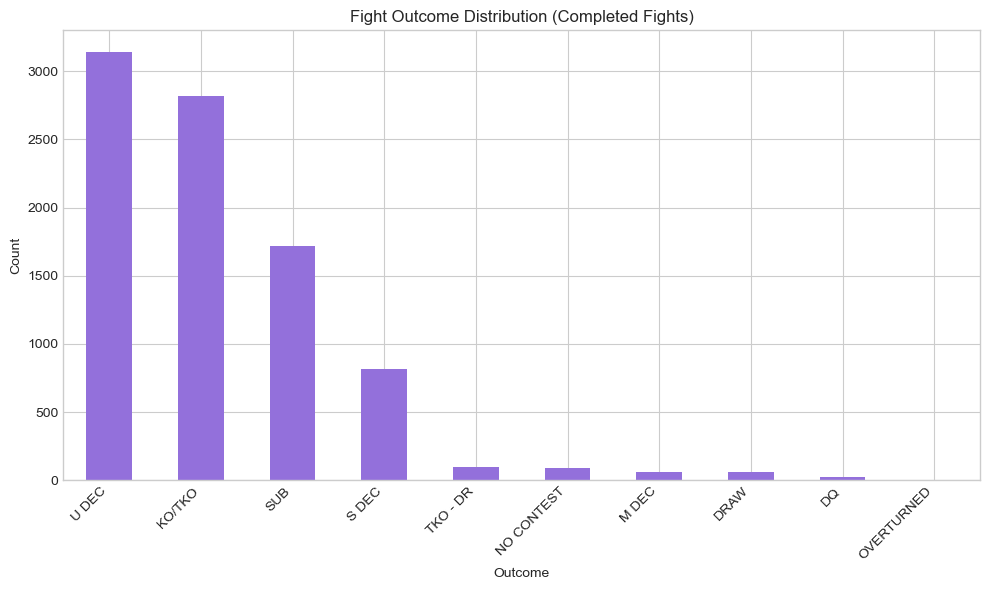

In [39]:
completed = ufc_events[ufc_events['fight_completed'] == 1]
outcomes = completed['fight_outcome'].value_counts()

plt.figure(figsize=(10, 6))
outcomes.plot(kind='bar', color='mediumpurple')
plt.title('Fight Outcome Distribution (Completed Fights)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

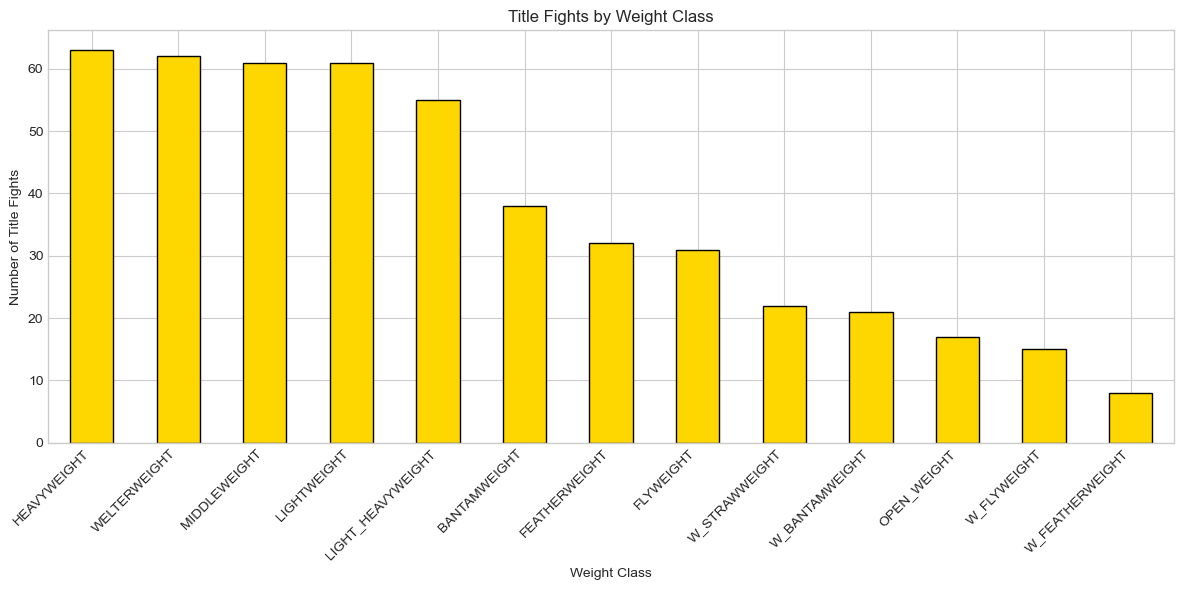

In [40]:
title_fight_events = ufc_events[ufc_events['title_fight'] == 1]
title_by_wc = title_fight_events['weight_class'].value_counts()

plt.figure(figsize=(12, 6))
title_by_wc.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Title Fights by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Title Fights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Combined Analysis

combining some datasets to look for interesting patterns. physical attributes are related to performance?


In [41]:
combined = fighter_attributes.merge(fighter_agg.drop(columns=['name', 'weight_class'], errors='ignore'), 
                                       on='fighter_id', how='left')

combined = combined.merge(fighter_wins[['wins', 'losses', 'total_fights', 'win_rate']], 
                                left_on='fighter_id', right_index=True, how='left')

combined.head()

,fighter_id,name,height,weight,age,dob,gender,weight_class,reach,stance,style,gym,country,TSL,TSA,SSL,SSA,KD,TDL,TDA,total_strike_acc,sig_strike_acc,takedown_acc,wins,losses,total_fights,win_rate
0,3332412,Islam Makhachev,177.80,70.31,33.0,1991-10-27,male,welterweight,179.07,southpaw,wrestling,eagles mma,russia,1022.0,1436.0,455.0,773.0,4.0,37.0,69.0,0.711699,0.588616,0.536232,16.0,1.0,17.0,0.941176
1,4350762,Zhang Weili,162.56,52.16,36.0,1989-08-13,female,womens-flyweight,160.02,switch,muay thai,beijing black tiger,china,1552.0,2421.0,897.0,1665.0,3.0,26.0,57.0,0.641057,0.538739,0.456140,10.0,2.0,12.0,0.833333
2,4294832,Carlos Prates,185.42,77.11,32.0,1993-08-17,male,welterweight,198.12,switch,striker,fighting nerds,brazil,247.0,454.0,244.0,449.0,9.0,1.0,1.0,0.544053,0.543430,1.000000,6.0,1.0,7.0,0.857143
3,4243624,Tracy Cortez,165.10,56.70,31.0,1993-12-10,female,womens-flyweight,166.37,orthodox,mixed martial artist,fight ready,usa,789.0,1354.0,493.0,999.0,0.0,19.0,40.0,0.582718,0.493493,0.475000,7.0,1.0,8.0,0.875000
4,4690541,Gregory Rodrigues,190.50,83.91,33.0,1992-02-17,male,middleweight,190.50,orthodox,grappling,kill cliff fc,brazil,630.0,1177.0,564.0,1093.0,7.0,15.0,39.0,0.535259,0.516011,0.384615,8.0,4.0,12.0,0.666667


 A correlation matrix is a good way to visualize relationships between multiple variables.


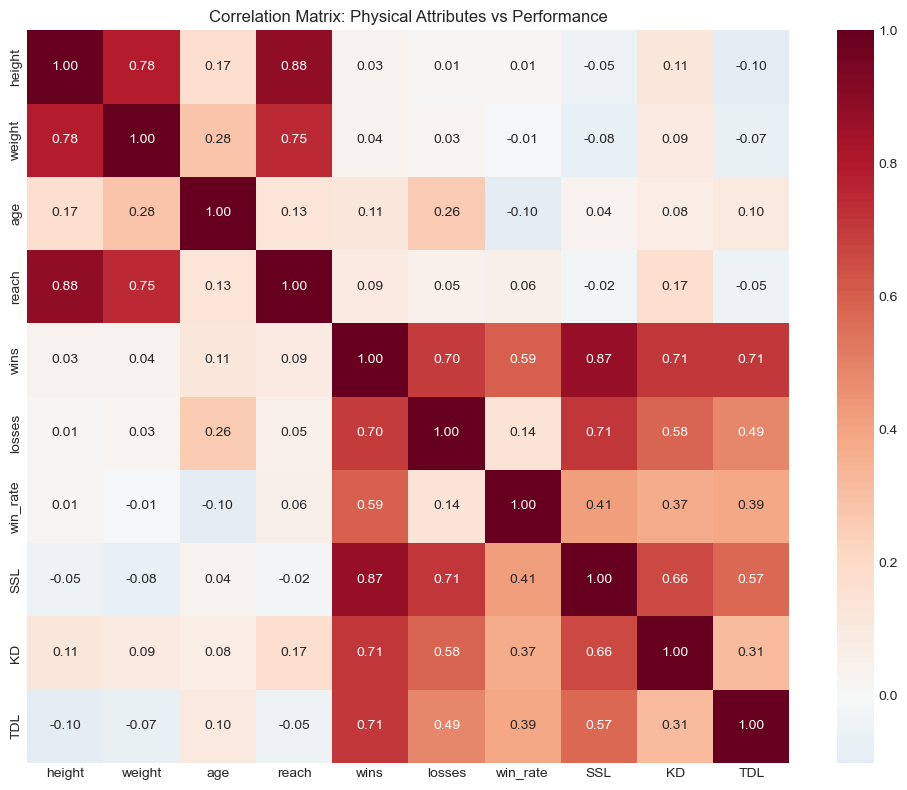

In [42]:
cols = ['height', 'weight', 'age', 'reach', 'wins', 'losses', 'win_rate', 'SSL', 'KD', 'TDL']
corr_matrix = combined[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Matrix: Physical Attributes vs Performance')
plt.tight_layout()
plt.show()

Height, weight, and reach are all strongly correlated with each other (obviously taller people weigh more and have longer arms). 

But the correlation between these physical attributes and win_rate is pretty weak. Reach has a small positive correlation with wins and win_rate though - this could be worth investigating more. Maybe fighters with longer reach relative to their height have an advantage?

Let me look at some specific breakdowns by stance and style.

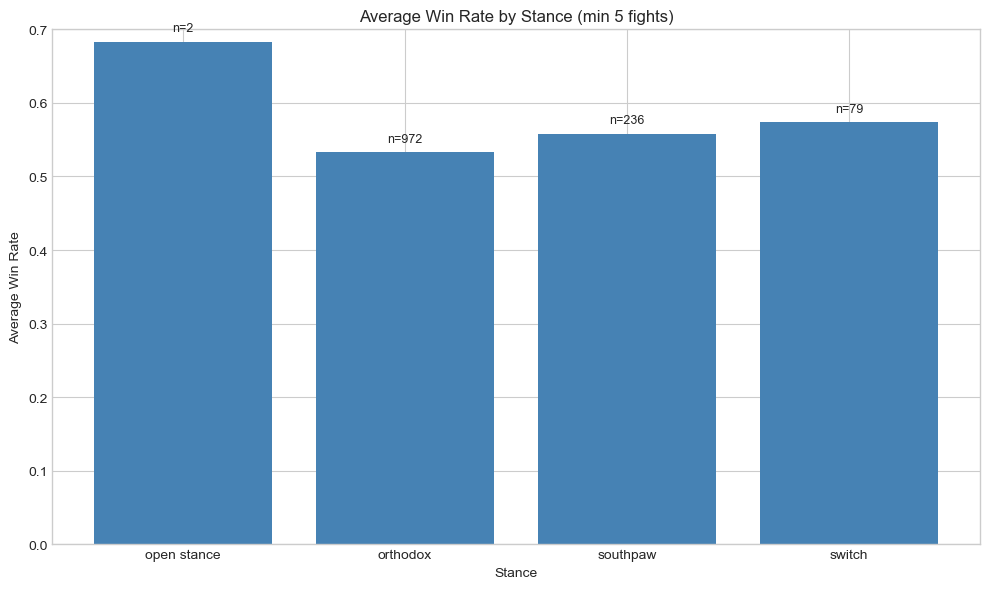

In [44]:
min_fights = 5
fighters_with_fights = combined[combined['total_fights'] >= min_fights]
stance_performance = fighters_with_fights.groupby('stance').agg({
    'win_rate': 'mean',
    'fighter_id': 'count'
}).rename(columns={'fighter_id': 'count'})

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(stance_performance.index, stance_performance['win_rate'], color='steelblue')
ax.set_title('Average Win Rate by Stance (min 5 fights)')
ax.set_xlabel('Stance')
ax.set_ylabel('Average Win Rate')
ax.set_ylim(0, 0.7)

for bar, count in zip(bars, stance_performance['count']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
            f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

This is interesting because open stance fighters are known to be very hard for opponents to defend against because of how uncommon it is. This is conveyed in the data with open stance fighters having low sample size (n=2) but the highest win rate. 

But overall stance doesn't seem to make a big difference in win rate. What about fighting style?

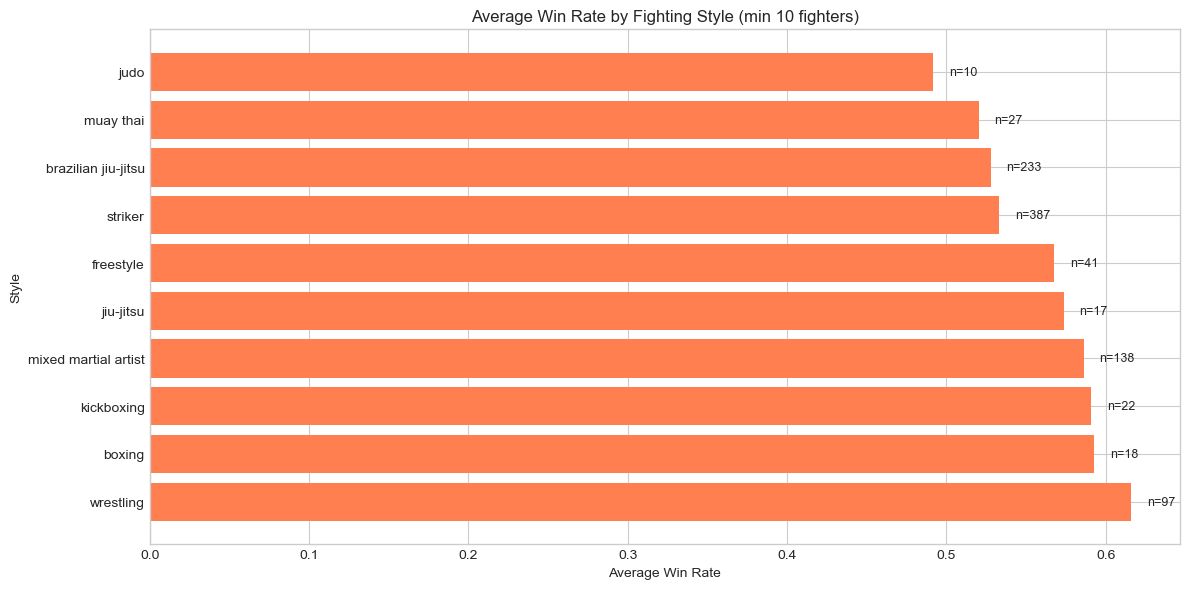

In [45]:
min_fighters_per_style = 10
style_performance = fighters_with_fights.groupby('style').agg({
    'win_rate': 'mean',
    'fighter_id': 'count'
}).rename(columns={'fighter_id': 'count'})

style_performance = style_performance[style_performance['count'] >= min_fighters_per_style]
style_performance = style_performance.sort_values('win_rate', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(style_performance.index, style_performance['win_rate'], color='coral')
plt.title('Average Win Rate by Fighting Style (min 10 fighters)')
plt.xlabel('Average Win Rate')
plt.ylabel('Style')

for bar, count in zip(bars, style_performance['count']):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'n={count}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Wrestling has teh highest win rate. Interesting! A lot of top grapplers are from Russia with wrestling backgrounds. This might be something to explore more whether Russian wrestlers/sambo fighters are more successful.

Reach advantage also might be interesting to look into. 

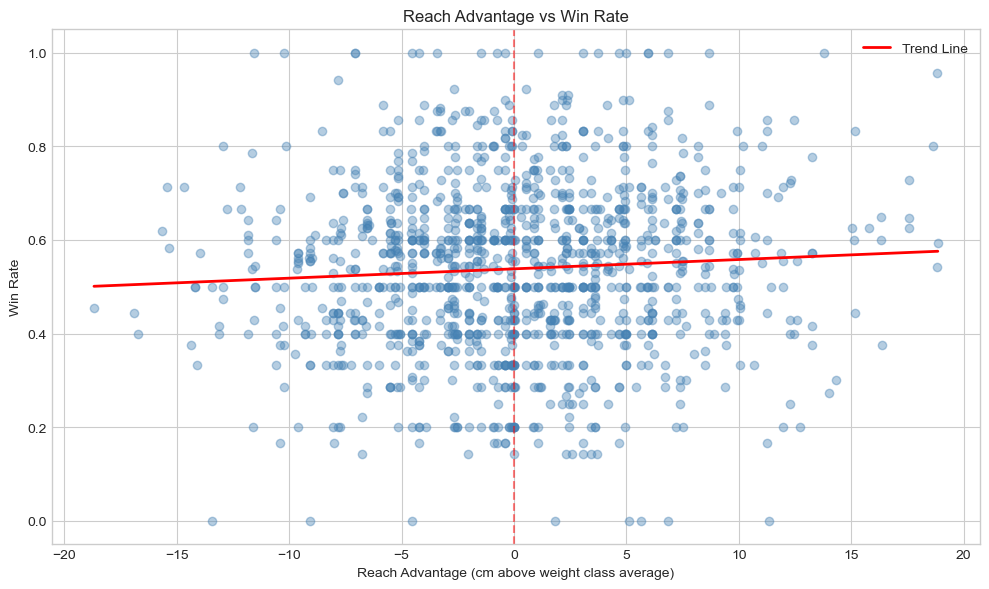

In [46]:
avg_reach_per_class = combined.groupby('weight_class')['reach'].mean()
combined['reach_advantage'] = combined.apply(
    lambda row: row['reach'] - avg_reach_per_class.get(row['weight_class'], row['reach']) 
    if pd.notna(row['reach']) else np.nan, axis=1
)

filtered_combined = combined[(combined['total_fights'] >= 5) & (combined['reach_advantage'].notna())]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_combined['reach_advantage'], filtered_combined['win_rate'], alpha=0.4, c='steelblue')
plt.axvline(0, color='red', linestyle='--', alpha=0.5)

z = np.polyfit(filtered_combined['reach_advantage'].dropna(), 
               filtered_combined.loc[filtered_combined['reach_advantage'].notna(), 'win_rate'].dropna(), 1)
p = np.poly1d(z)
x_vals = np.linspace(filtered_combined['reach_advantage'].min(), filtered_combined['reach_advantage'].max(), 100)
plt.plot(x_vals, p(x_vals), color='red', linewidth=2, label='Trend Line')

plt.title('Reach Advantage vs Win Rate')
plt.xlabel('Reach Advantage (cm above weight class average)')
plt.ylabel('Win Rate')
plt.legend()
plt.tight_layout()
plt.show()

There does seem to be a slight positive trend, fighters with longer reach for their weight class tend to have slightly higher win rates. But there's a lot of noise in the data. 

Maybe looking at reach/height ratio would be better to control for the fact that taller fighters naturally have longer reach. This is something I'll explore in more depth in a separate notebook.

## 7. Summary

final summary statistics.

In [47]:
print("="*60)
print("UFC DATA SUMMARY")
print("="*60)

num_fighters = len(fighter_attributes)
num_male = (fighter_attributes['gender'] == 'male').sum()
num_female = (fighter_attributes['gender'] == 'female').sum()
num_weight_classes = fighter_attributes['weight_class'].nunique()
num_countries = fighter_attributes['country'].nunique()
avg_age = fighter_attributes['age'].mean()
avg_height = fighter_attributes['height'].mean()

print(f"\nFIGHTERS:")
print(f"  Total fighters in database: {num_fighters}")
print(f"  Male fighters: {num_male}")
print(f"  Female fighters: {num_female}")
print(f"  Weight classes: {num_weight_classes}")
print(f"  Countries represented: {num_countries}")
print(f"  Average age: {avg_age:.1f} years")
print(f"  Average height: {avg_height:.1f} cm")

print(f"\nFIGHT HISTORY:")
print(f"  Total fights recorded: {len(fighter_history)}")
print(f"  Title fights: {(fighter_history['title_fight'] == True).sum()}")
print(f"  Most common result type: {fighter_history['fight_result_type'].mode()[0]}")

print(f"\nEVENTS:")
print(f"  Total events: {ufc_events['event_id'].nunique()}")
print(f"  Venues used: {ufc_events['event_venue'].nunique()}")
print(f"  Countries hosted: {ufc_events['event_venue_country'].nunique()}")

print("\n" + "="*60)

UFC DATA SUMMARY

FIGHTERS:
  Total fighters in database: 3035
  Male fighters: 2746
  Female fighters: 289
  Weight classes: 15
  Countries represented: 112
  Average age: 37.0 years
  Average height: 178.2 cm

FIGHT HISTORY:
  Total fights recorded: 17837
  Title fights: 959
  Most common result type: DEC-UNA

EVENTS:
  Total events: 859
  Venues used: 229
  Countries hosted: 34



## Takeaways & Next Steps

From this initial exploration, here are some patterns that the group found that we want to investigate more:

1. **Reach-to-Height Ratio**: Reach has a small positive correlation with win rate. I want to look at whether fighters with proportionally longer arms (high reach/height ratio) have an advantage. This makes sense from a fighting perspective, longer reach means you can hit opponents while staying out of their range.

2. **Fighting Style Analysis**: Wrestling and Sambo fighters seem to have higher win rates. Combined with Russia being a top country for fighters, I want to look at whether fighters with grappling backgrounds (especially Russian wrestlers/sambo fighters) are more dominant than strikers.

3. **Age and Performance**: The age distribution is interesting - I might want to explore how age affects performance and at what age fighters tend to peak.

These will be the focus of our further analysis.